## 변수설명

* ID : 집을 구분하는 번호
* date : 집을 구매한 날짜
* price : 집의 가격(Target variable)
* bedrooms : 침실의 수
* bathrooms : 화장실의 수
>* full bath : 화장실, 세면대, 샤워실, 욕조
>* 3/4 bath : 화장실, 세면대, 샤워실
>* half bath : 화장실, 세면대
* sqft_living : 주거 공간의 평방 피트(면적)
* sqft_lot : 부지의 평방 피트(면적)
* floors : 집의 층 수
* waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
* view : Has been viewed
* condition : 집의 전반적인 상태
* grade : King County grading 시스템 기준으로 매긴 집의 등급
* sqft_above : 지하실을 제외한 평방 피트(면적)
* sqft_basement : 지하실의 평방 피트(면적)
* yr_built : 지어진 년도
* yr_renovated : 집을 재건축한 년도
* zipcode : 우편번호
* lat : 위도
* long : 경도
* sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
* sqft_lot15 : 2015년 기준 주차 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있

In [63]:
import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc

In [64]:
df_train = pd.read_csv('train.csv')
df_test  = pd.read_csv('test.csv')
print("train.csv. Shape: ",df_train.shape)
print("test.csv. Shape: ",df_test.shape)

train.csv. Shape:  (15035, 21)
test.csv. Shape:  (6468, 20)


In [65]:
df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [66]:
# 결측치 확인
(df_train.isnull()).sum(axis=0) #걸럼별 결측치 계수

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [67]:
df_train["bathrooms"].drop_duplicates()

0        1.00
2        2.00
3        2.25
4        1.50
5        2.50
8        1.75
10       3.00
16       2.75
39       3.25
51       4.00
78       3.50
143      0.75
192      4.75
212      5.00
300      4.25
325      4.50
374      3.75
842      5.25
947      6.00
1204     1.25
1617     0.50
1882     5.50
2859     6.75
3134     5.75
4123     0.00
5108     8.00
5990     7.50
6469     7.75
10152    6.25
Name: bathrooms, dtype: float64

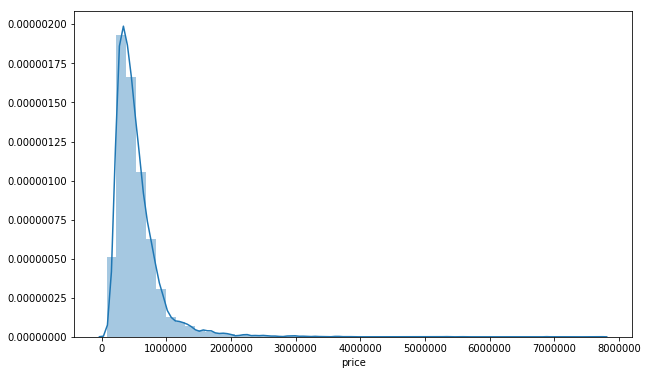

In [68]:
f, ax = plt.subplots(figsize=(10, 6))
sns.distplot(df_train['price'])

In [69]:
df_train['price']

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
5         662500.0
6         468000.0
7         310000.0
8         400000.0
9         530000.0
10        650000.0
11        395000.0
12        485000.0
13        189000.0
14        230000.0
15        385000.0
16       2000000.0
17        252700.0
18        329000.0
19        233000.0
20        937000.0
21        667000.0
22        580500.0
23        687500.0
24        535000.0
25        322500.0
26        696000.0
27        640000.0
28        240000.0
29        605000.0
           ...    
15005     330000.0
15006     608500.0
15007     785000.0
15008     610950.0
15009     399950.0
15010     579000.0
15011     362500.0
15012     645000.0
15013     594866.0
15014     490000.0
15015     399950.0
15016     270000.0
15017     505000.0
15018     385000.0
15019     414500.0
15020     347500.0
15021    1222500.0
15022    1088000.0
15023     350000.0
15024     679950.0
15025    1575000.0
15026     81

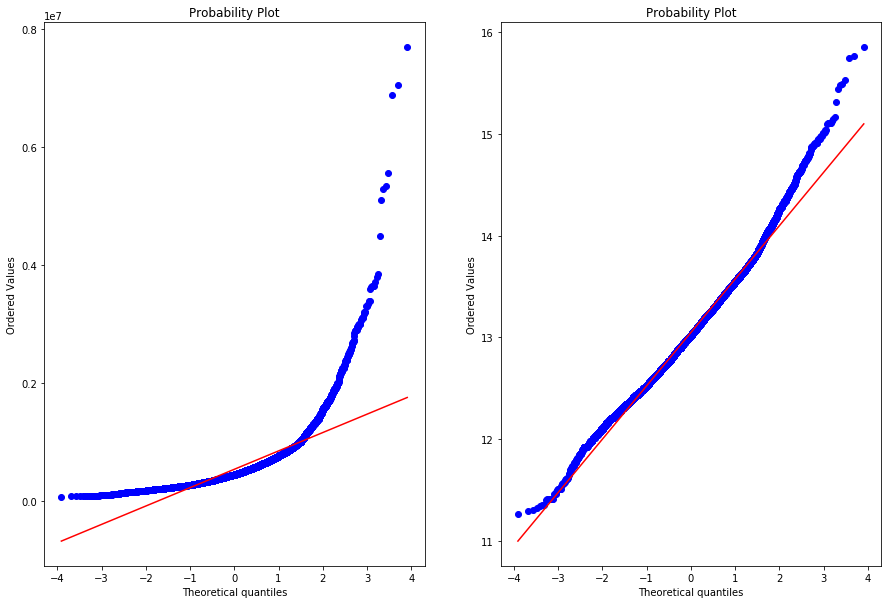

In [8]:
fig = plt.figure(figsize = (15,10))

fig.add_subplot(1,2,1)
res = stats.probplot(df_train['price'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(df_train['price']), plot=plt)

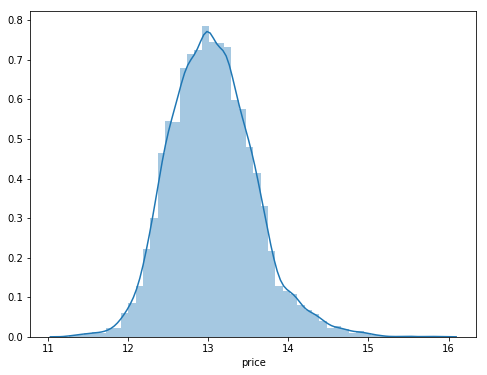

In [9]:
df_train['price'] = np.log1p(df_train['price'])
#histogram
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df_train['price'])

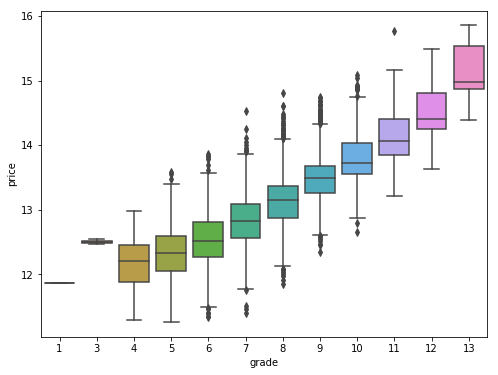

In [10]:
data = pd.concat([df_train['price'], df_train['grade']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='grade', y="price", data=data)

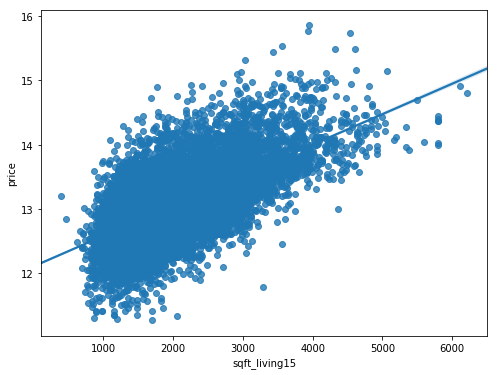

In [11]:
data = pd.concat([df_train['price'], df_train['sqft_living15']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='sqft_living15', y="price", data=data)

In [61]:
color_set = np.where(df_train['price'] <= 12, 'green', 
    np.where((12 < df_train['price']) & (df_train['price'] <= 13),'fuchsia',
    np.where((13 < df_train['price']) & (df_train['price'] <= 14),'blue',
    np.where((14 < df_train['price']) & (df_train['price'] <= 15),'yellow',
    'cyan'))))


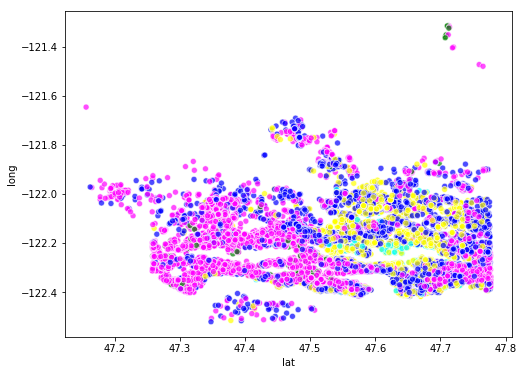

In [62]:
data = pd.concat([df_train['lat'], df_train['long']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.scatterplot(x='lat', y="long", data=data, c=color_set, alpha=0.7)

In [73]:
df_train['date'][0][0:6]

'201410'

In [74]:
def datePreprocessing(text):
    return text[0:6]

In [75]:
df_train['date'] = df_train['date'].apply(datePreprocessing)

In [82]:
df_train['date'].unique()

array(['201410', '201502', '201406', '201501', '201504', '201405',
       '201503', '201407', '201412', '201408', '201411', '201409',
       '201505'], dtype=object)

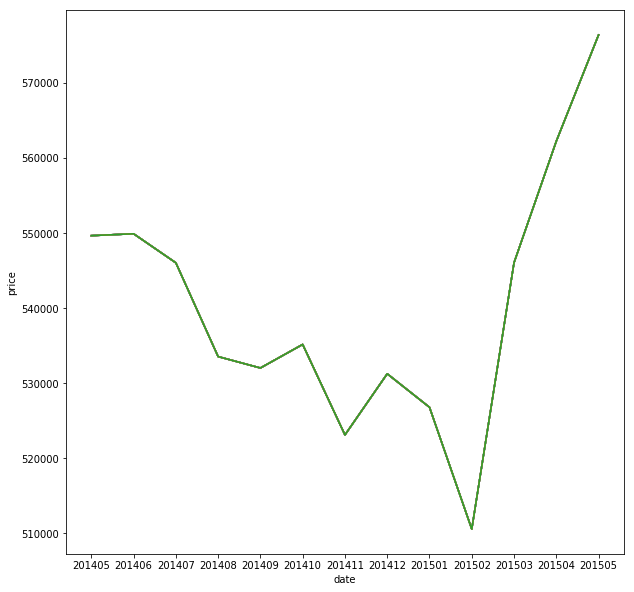

In [145]:
dt = df_train.groupby(['date'], as_index=False)['price'].mean()
sorted_zipcode = sorted(df_train['date'].unique())
f, ax = plt.subplots(10,0,figsize=(10, 10))
for i, zipcode in enumerate(sorted_zipcode):
    ax = sns.lineplot(x="date", y="price", data=dt)

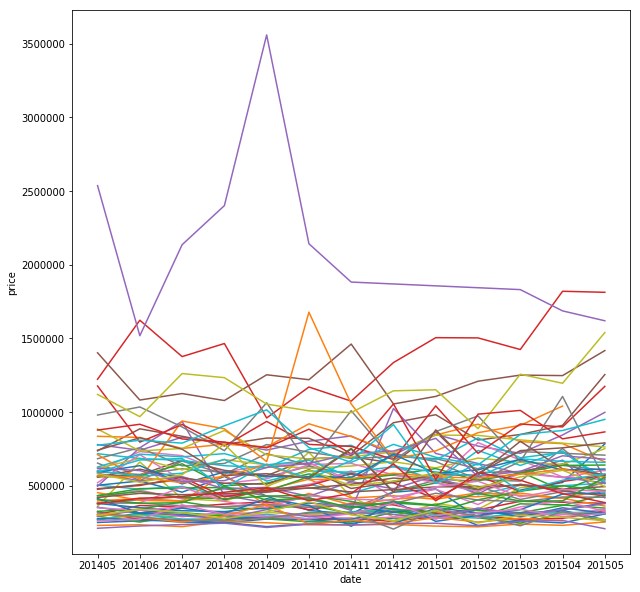

In [144]:
dt = df_train.groupby(['zipcode','date'], as_index=False)['price'].mean()
sorted_zipcode = sorted(df_train['zipcode'].unique())
f, ax = plt.subplots(10,0,figsize=(10, 10))
for i, zipcode in enumerate(sorted_zipcode):
    ax = sns.lineplot(x="date", y="price", data=dt[dt['zipcode'] == zipcode])

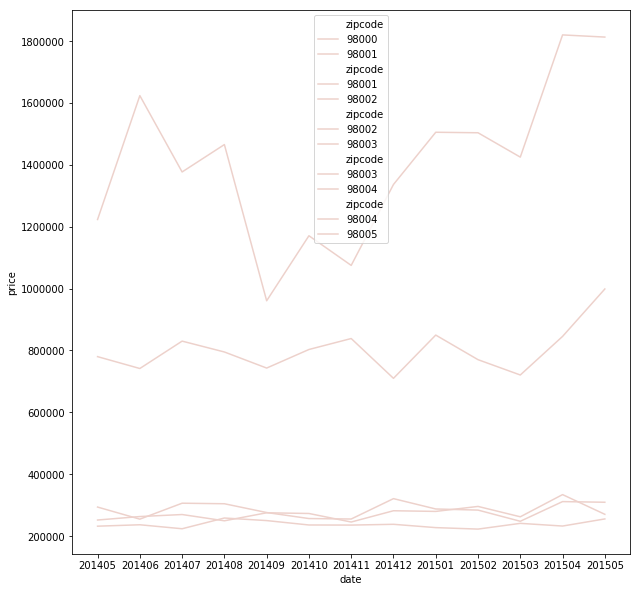

In [141]:
##### dt = df_train.groupby(['date'], as_index=False)['price'].mean()
#sns.lineplot(x='date', y='price', data=dt)
dt = df_train.groupby(['zipcode','date'], as_index=False)['price'].mean()
sorted_zipcode = sorted(df_train['zipcode'].unique())
f, ax = plt.subplots(figsize=(10, 10))
for i, zipcode in enumerate(sorted_zipcode[:5]):
    #sns.lineplot(x='date', y='price', data=dt[dt['zipcode'] == zipcode], hue='zipcode')
    #ax[1][0].set_title(zipcode, fontsize=20)
    ax = sns.lineplot(x="date", y="price",
                        hue="zipcode", style="zipcode",
                        data=dt[dt['zipcode'] == zipcode])

In [106]:
dt[dt['zipcode'] == sorted_zipcode[0]]

,zipcode,date,price
0,98001,201405,251799.772727
1,98001,201406,263023.529412
2,98001,201407,269565.909091
3,98001,201408,249275.000000
4,98001,201409,275188.217391
5,98001,201410,272938.636364
6,98001,201411,245316.875000
7,98001,201412,281777.777778
8,98001,201501,279654.166667
9,98001,201502,295761.538462
